Импорт библиотеек и опциональные настройки

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import os
import re
import requests

from itertools import combinations
# from scipy.stats import ttest_ind
import numpy as np
# import wargnings
import random
# warnings.simplefilter('ignore')

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
import datetime
from datetime import datetime, timedelta

Загрузка датасета

In [150]:
main_df = pd.read_csv('main_task_new.csv')


In [151]:
main_df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


Restaurant_id — идентификационный номер ресторана / сети ресторанов;
City — город, в котором находится ресторан;
Cuisine Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города;
Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
Price Range — диапазон цен в ресторане в 3 категориях;
Number of Reviews — количество отзывов о ресторане;
Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;
URL_TA — URL страницы ресторана на TripAdvisor - 'www.tripadvisor.com';
ID_TA — идентификатор ресторана в базе данных TripAdvisor.

In [152]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [153]:
# количество ценовых категорий
main_df['Price Range'].nunique()

3

In [154]:
# Количество городов
main_df['City'].nunique()

31

In [155]:
main_df['City'].value_counts().sort_index(ascending=True)

Amsterdam     1086
Athens         628
Barcelona     2734
Berlin        2155
Bratislava     301
Brussels      1060
Budapest       816
Copenhagen     659
Dublin         673
Edinburgh      596
Geneva         481
Hamburg        949
Helsinki       376
Krakow         443
Lisbon        1300
Ljubljana      183
London        5757
Luxembourg     210
Lyon           892
Madrid        3108
Milan         2133
Munich         893
Oporto         513
Oslo           385
Paris         4897
Prague        1443
Rome          2078
Stockholm      820
Vienna        1166
Warsaw         727
Zurich         538
Name: City, dtype: int64

In [156]:
# Создаем новый признак Cuisine_sum с количеством кухонь в ресторане
main_df['Cuisine_sum'] = main_df['Cuisine Style'].str.count(', ') + 1
main_df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Cuisine_sum
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,3.0
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,NaN
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,7.0
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,NaN
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,3.0


In [157]:
# Если информация о количестве кухонь отсутствует считаем что там только один тип кухни
main_df['Cuisine_sum'].fillna(1, inplace=True)

In [158]:
# Создаем признаки дат отзывов 
def review_to_date(review):
    pattern = re.compile('\'\d+\/\d+\/\d+\'?')
    dat = pattern.findall(review)
    if len(dat) >= 2:
        datetime_list = []
        for date in dat:
            date = date[1:-1]
            dt = datetime.strptime(date, '%m/%d/%Y')
            datetime_list.append(dt)
        return datetime_list
    else:
        return (dat)
main_df['Reviews'] = main_df['Reviews'].astype(str)
main_df['Dates_of_Reviews'] = main_df['Reviews'].apply(lambda x: review_to_date(x)) 
main_df['Dates_of_Reviews']

0        [2017-12-31 00:00:00, 2017-11-20 00:00:00]
1        [2017-07-06 00:00:00, 2016-06-19 00:00:00]
2        [2018-01-08 00:00:00, 2018-01-06 00:00:00]
3                                                []
4        [2017-11-18 00:00:00, 2017-02-19 00:00:00]
                            ...                    
39995    [2017-12-16 00:00:00, 2017-11-12 00:00:00]
39996    [2017-12-21 00:00:00, 2017-12-12 00:00:00]
39997    [2016-11-03 00:00:00, 2008-04-12 00:00:00]
39998    [2017-07-11 00:00:00, 2017-06-18 00:00:00]
39999    [2016-01-31 00:00:00, 2012-07-04 00:00:00]
Name: Dates_of_Reviews, Length: 40000, dtype: object

In [159]:
# заполняем пропуски
main_df['Dates_of_Reviews'].fillna('нет значений', inplace = True)

In [160]:
# заполняем пропуски
main_df['Number of Reviews'].fillna(1, inplace=True)

In [161]:
len(main_df['Reviews'].value_counts().loc[lambda x: x > 1])


15

In [162]:
# 6471 строк без отзывов
main_df['Reviews'].value_counts().loc[lambda x: x> 1]

[[], []]                                                                                                                              6471
[['Great Food! Wide Variety.', 'Dinner'], ['11/26/2017', '05/23/2017']]                                                                  2
[['Simply Excellent!', 'Modern!'], ['10/22/2017', '08/29/2017']]                                                                         2
[['Sat night', 'Can\'t even explain.. "A" place.. A "100...'], ['10/22/2017', '05/11/2017']]                                             2
[['Whenever in Madrid, we never miss this gem...', 'Underrated sushi restaurant with very good...'], ['04/11/2017', '12/02/2016']]       2
[['Happened to drop in', 'Right for a quick bite'], ['11/30/2016', '06/20/2015']]                                                        2
[['Healthy vegan doughnuts are posible', 'Best Vegan Donut in the world !!!'], ['11/17/2017', '11/16/2017']]                             2
[['Nice restaurant in Madri

In [163]:
# Создадим признак положительных отзывов
# Опишем функцию, которая по заданному списку будет искать слова в строках и возвращать 1 или 0.
#1 если есть такие слова (хотя бы одно) или 0 - если нет
def find_good_words(s):
    good_words = ['good', 'yummy', 'fine', 'great', 'tasty',
                  'satisfaction', 'amazing', 'nice', 'best',
                  'friendly', 'pleasant', 'exellent', 'loved',
                  'love', 'lovely', 'welcoming', 'wonderful',
                  'perfect', 'delicious', 'favourite', 'sweet',
                  'yum', 'adequate', 'happy', 'beautiful', 'liked', 'like']
    count = 0
    for item in good_words:
        if item in s:
            count += 1
        if count >= 1:
            result = 1
        else:
            result = 0

        return(result)
main_df['Good_rev'] = main_df.Reviews.str.lower().apply(find_good_words) # применим описанную функцию для создания нового признака (edited) 
main_df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Cuisine_sum,Dates_of_Reviews,Good_rev
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,3.0,"[2017-12-31 00:00:00, 2017-11-20 00:00:00]",1
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,1.0,"[2017-07-06 00:00:00, 2016-06-19 00:00:00]",0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,7.0,"[2018-01-08 00:00:00, 2018-01-06 00:00:00]",0
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,1.0,[],0
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,3.0,"[2017-11-18 00:00:00, 2017-02-19 00:00:00]",0


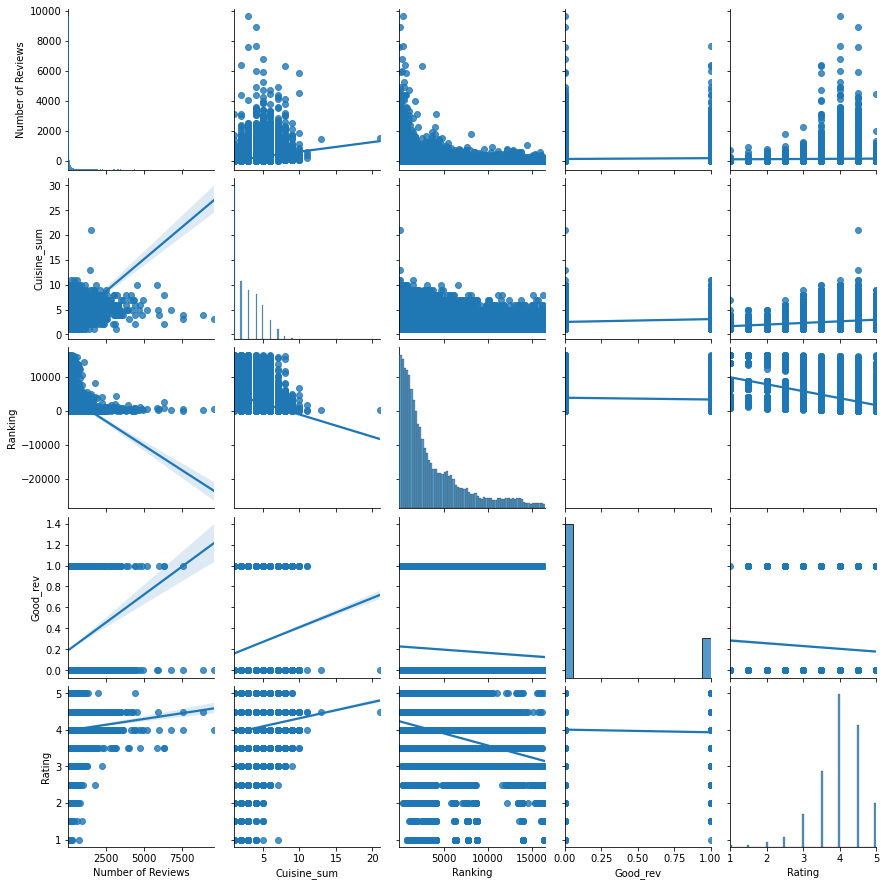

In [164]:
main_num = ['Number of Reviews', 'Cuisine_sum', 'Ranking', 'Good_rev', 'Price Range', 'Rating']
sns.pairplot(main_df[main_num], kind = 'reg');

In [165]:
main_df[main_num].corr()

,Number of Reviews,Cuisine_sum,Ranking,Good_rev,Rating
Number of Reviews,1.000000,0.405528,-0.222012,0.075543,0.026934
Cuisine_sum,0.405528,1.000000,-0.320250,0.125841,0.120059
Ranking,-0.222012,-0.320250,1.000000,-0.056922,-0.368371
Good_rev,0.075543,0.125841,-0.056922,1.000000,-0.043693
Rating,0.026934,0.120059,-0.368371,-0.043693,1.000000


In [166]:
# Создадим числовой признак Price_Range
main_df['Price Range'] = main_df['Price Range'].replace('$', 1)

In [167]:
main_df['Price Range'] = main_df['Price Range'].replace('$$ - $$$', 2)

In [168]:
main_df['Price Range'] = main_df['Price Range'].replace('$$$$' , 3)

In [169]:
# Посмотрим средние значения количества отзывов по разным ценовым категориям ресторанов.
main_ds = main_df.groupby(by = ['Price Range'])['Cuisine_sum'].agg(['mean']).sort_values('mean', ascending=False).round(2)
main_ds.head()

,mean
Price Range,
3.0,3.85
2.0,3.50
1.0,2.89


In [172]:
# Заполним пропуски
#Функция fill_Price_Range()
def fill_Price_Range(row):
    if pd.isnull(row['Price Range']):
        if row['Number of Reviews'] <= 2.9:
            return 1
        if row['Number of Reviews'] <= 3.5:
            return 2
        if row['Number of Reviews'] > 3.5:
            return 3
    return row['Price Range']
main_df['Price Range'] = main_df.apply(fill_Price_Range, axis = 1)

In [173]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        40000 non-null  float64
 6   Number of Reviews  40000 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
 10  Cuisine_sum        40000 non-null  float64
 11  Dates_of_Reviews   40000 non-null  object 
 12  Good_rev           40000 non-null  int64  
dtypes: float64(5), int64(1), object(7)
memory usage: 4.0+ MB


In [174]:
# Проверим повторяемость id ресторанов
main_df['Restaurant_id'].value_counts()

id_871      18
id_436      18
id_633      18
id_227      18
id_585      17
            ..
id_6842      1
id_11034     1
id_15811     1
id_5955      1
id_7626      1
Name: Restaurant_id, Length: 11909, dtype: int64

In [175]:
# Видимо это сетевые рестораны
main_df[main_df['Restaurant_id'] == 'id_227'].sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Cuisine_sum,Dates_of_Reviews,Good_rev
38462,id_227,Geneva,"['Japanese', 'Sushi', 'Asian', 'Fusion', 'Vege...",229.0,4.5,3.0,92.0,"[['Amazing', 'Good location with a great view'...",/Restaurant_Review-g188057-d6393335-Reviews-Um...,d6393335,5.0,"[2017-12-24 00:00:00, 2017-08-25 00:00:00]",1
14990,id_227,Dublin,"['Italian', 'Pizza', 'Mediterranean', 'Europea...",228.0,4.5,2.0,119.0,"[['Fantastic with young people', 'Italian Scho...",/Restaurant_Review-g186605-d10516461-Reviews-P...,d10516461,7.0,"[2018-01-02 00:00:00, 2017-12-11 00:00:00]",0
1065,id_227,Luxembourg,"['Lebanese', 'Mediterranean', 'Middle Eastern'...",228.0,4.0,2.0,21.0,"[['Nice little Lebanese restaurant', 'Great fo...",/Restaurant_Review-g190356-d10275783-Reviews-K...,d10275783,4.0,"[2017-08-23 00:00:00, 2017-07-31 00:00:00]",0
9299,id_227,Amsterdam,"['Dutch', 'Bar', 'European', 'Gastropub', 'Caf...",228.0,4.5,2.0,201.0,"[['Historic jewel of a bar in Amsterdam', 'Gre...",/Restaurant_Review-g188590-d753101-Reviews-Pro...,d753101,6.0,"[2017-12-30 00:00:00, 2017-12-17 00:00:00]",0
13876,id_227,Rome,"['Italian', 'Pizza', 'Mediterranean', 'Vegetar...",228.0,4.5,2.0,1066.0,"[['Great start to Italian food journey', 'My F...",/Restaurant_Review-g187791-d1516161-Reviews-Go...,d1516161,6.0,"[2018-01-07 00:00:00, 2017-12-12 00:00:00]",0


In [176]:
main_df['Cuisine Style'].value_counts(dropna=False).head(15)

NaN                             9283
['Italian']                     1032
['French']                       805
['Spanish']                      695
['French', 'European']           405
['Cafe']                         403
['Pizza']                        371
['Italian', 'Pizza']             343
['European', 'Portuguese']       342
['Chinese']                      328
['Mediterranean']                256
['Bar', 'Pub']                   255
['Mediterranean', 'Spanish']     236
['Indian']                       214
['Vegetarian Friendly']          206
Name: Cuisine Style, dtype: int64

In [177]:
# Посмотрим как кухни распределены по городам
main_df[['City', 'Cuisine Style']].groupby('City').describe()

Cuisine Style                                                     
                   count unique                                      top freq
City                                                                         
Amsterdam            933    587                    ['Dutch', 'European']   28
Athens               509    252                                ['Greek']   72
Barcelona           2083    860                              ['Spanish']  191
Berlin              1430    655                              ['Italian']   73
Bratislava           191    135                                  ['Pub']   14
Brussels             795    417                  ['Belgian', 'European']   45
Budapest             653    425                ['European', 'Hungarian']   61
Copenhagen           489    314                   ['European', 'Danish']   17
Dublin               562    369                  ['Irish', 'Bar', 'Pub']   20
Edinburgh            528    349                                 ['Cafe']   12
Geneva               384    227  ['French', 'Mediterranean', 'European']   18
Hamburg              542    292                              ['Italian']   25
Helsinki             292    192                           ['Bar', 'Pub']   10
Krakow               354    234                   ['Polish', 'European']   33
Lisbon               989    425               ['European', 'Portuguese']  219
Ljubljana            154    120                ['European', 'Slovenian']    8
London              4775   1875                ['Bar', 'British', 'Pub']  163
Luxembourg           174    117                               ['French']    9
Lyon                 590    217                               ['French']  151
Madrid              2151    731                              ['Spanish']  424
Milan               1574    597                              ['Italian']  247
Munich               636    353                              ['Italian']   24
Oporto               394    207               ['European', 'Portuguese']   81
Oslo                 311    242                                  ['Pub']    8
Paris               3859    975                               ['French']  536
Prague              1194    540                    ['European', 'Czech']  182
Rome                1824    726                              ['Italian']  182
Stockholm            565    328                  ['European', 'Swedish']   23
Vienna               850    482                 ['Austrian', 'European']   67
Warsaw               523    316                   ['Polish', 'European']   35
Zurich               409    292                    ['Swiss', 'European']   14

In [178]:
main_df[['City', 'Cuisine Style']].groupby('City')['Cuisine Style'].value_counts()['Paris'].head(10)

Cuisine Style
['French']                                       536
['French', 'European']                           312
['French', 'European', 'Vegetarian Friendly']    150
['Italian']                                      108
['Japanese']                                      85
['Japanese', 'Sushi']                             70
['Chinese']                                       53
['French', 'Bar', 'European']                     51
['Vietnamese']                                    40
['French', 'Vegetarian Friendly']                 38
Name: Cuisine Style, dtype: int64

In [179]:
main_df[['City', 'Cuisine Style']].groupby('City')['Cuisine Style'].value_counts()['Paris'].head(1).index[0]

"['French']"

In [180]:
main_df[['City', 'Cuisine Style']].groupby('City')['Cuisine Style'].value_counts()['Paris'].head(10)

Cuisine Style
['French']                                       536
['French', 'European']                           312
['French', 'European', 'Vegetarian Friendly']    150
['Italian']                                      108
['Japanese']                                      85
['Japanese', 'Sushi']                             70
['Chinese']                                       53
['French', 'Bar', 'European']                     51
['Vietnamese']                                    40
['French', 'Vegetarian Friendly']                 38
Name: Cuisine Style, dtype: int64

In [181]:
# Количество встречающихся стилей кухонь в наборах стилей
cuisine_dict = {}
styles_count = []
for style_set in main_df[main_df['Cuisine Style'].notna()]['Cuisine Style']:
    style_set_list = style_set.replace(', ', ',').replace('[', '').replace(']', '').replace("'", "").replace('"', '').split(',')
   
   
    
  
    styles_count.append(len(style_set_list))
    for cuisine_style in style_set_list:
        if cuisine_style in cuisine_dict:
                                                        
            cuisine_dict[cuisine_style] += 1
        else:
            cuisine_dict[cuisine_style] = 1                                           
                                                        
                                                        
sorted_cuisine_dict = {}
sorted_keys = sorted(cuisine_dict, key=cuisine_dict.get)
                                                        
for w in sorted_keys:
    sorted_cuisine_dict[w] = cuisine_dict[w]
sorted_cuisine_dict                                                        

{'Salvadoran': 1,
 'Yunnan': 1,
 'Xinjiang': 1,
 'Burmese': 1,
 'Latvian': 1,
 'Polynesian': 2,
 'Azerbaijani': 2,
 'Fujian': 2,
 'Welsh': 2,
 'Ecuadorean': 4,
 'Caucasian': 4,
 'Native American': 4,
 'Uzbek': 5,
 'Canadian': 5,
 'New Zealand': 6,
 'Chilean': 8,
 'Albanian': 8,
 'Romanian': 10,
 'Minority Chinese': 11,
 'Central Asian': 12,
 'Filipino': 12,
 'Mongolian': 14,
 'Armenian': 14,
 'Southwestern': 17,
 'Georgian': 17,
 'Ukrainian': 18,
 'Singaporean': 19,
 'Egyptian': 20,
 'Colombian': 20,
 'Cambodian': 20,
 'Cajun & Creole': 20,
 'Hawaiian': 21,
 'Tunisian': 21,
 'Taiwanese': 22,
 'Afghani': 22,
 'Cuban': 23,
 'Tibetan': 24,
 'Australian': 24,
 'Jamaican': 25,
 'Sri Lankan': 25,
 'Croatian': 27,
 'Malaysian': 31,
 'Venezuelan': 40,
 'Ethiopian': 42,
 'Kosher': 48,
 'Arabic': 51,
 'Persian': 53,
 'Russian': 58,
 'Indonesian': 59,
 'Slovenian': 68,
 'Israeli': 74,
 'Norwegian': 75,
 'Bangladeshi': 76,
 'Nepali': 83,
 'Balti': 83,
 'Caribbean': 93,
 'Peruvian': 94,
 'Pakistani

In [182]:
len(main_df['URL_TA'].value_counts().loc[lambda x: x > 1])

20

In [183]:
main_df['ID_TA'].value_counts().loc[lambda x: x > 1]

d10047799    2
d987900      2
d1315077     2
d7342803     2
d9802625     2
d11999956    2
d2477531     2
d697406      2
d7337366     2
d3161682     2
d4600226     2
d3685055     2
d11698990    2
d11921719    2
d11674463    2
d13002276    2
d793170      2
d9877640     2
d8753348     2
d7809594     2
Name: ID_TA, dtype: int64

In [184]:
len(main_df['ID_TA'].value_counts().loc[lambda x: x > 1])

20

In [185]:
print(main_df[main_df['ID_TA'] == 'd8753348']['Reviews'])

13942    [['ok for beer, not for dinner'], ['12/20/2017']]
31238    [['ok for beer, not for dinner'], ['12/20/2017']]
Name: Reviews, dtype: object


In [186]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        40000 non-null  float64
 6   Number of Reviews  40000 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
 10  Cuisine_sum        40000 non-null  float64
 11  Dates_of_Reviews   40000 non-null  object 
 12  Good_rev           40000 non-null  int64  
dtypes: float64(5), int64(1), object(7)
memory usage: 4.0+ MB


In [187]:
encoded = pd.get_dummies(main_df['City'])

In [188]:
main_dc = pd.concat([main_df, encoded], axis = 1)
main_dc.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2.0,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,...,0,0,0,1,0,0,0,0,0,0
1,id_1535,Stockholm,NaN,1537.0,4.0,3.0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,...,0,0,0,0,0,0,1,0,0,0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3.0,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,...,0,0,0,0,0,0,0,0,0,0
3,id_3456,Berlin,NaN,3458.0,5.0,2.0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,...,0,0,0,0,0,0,0,0,0,0
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2.0,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,...,1,0,0,0,0,0,0,0,0,0


In [189]:
# Удалим все нечисловые столбцы
main_fa = main_dc.copy()
main_f = main_fa.drop(["City", "Restaurant_id", "Cuisine Style", "Reviews", "URL_TA", 'Dates_of_Reviews', "ID_TA"], axis=1)
main_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            40000 non-null  float64
 1   Rating             40000 non-null  float64
 2   Price Range        40000 non-null  float64
 3   Number of Reviews  40000 non-null  float64
 4   Cuisine_sum        40000 non-null  float64
 5   Good_rev           40000 non-null  int64  
 6   Amsterdam          40000 non-null  uint8  
 7   Athens             40000 non-null  uint8  
 8   Barcelona          40000 non-null  uint8  
 9   Berlin             40000 non-null  uint8  
 10  Bratislava         40000 non-null  uint8  
 11  Brussels           40000 non-null  uint8  
 12  Budapest           40000 non-null  uint8  
 13  Copenhagen         40000 non-null  uint8  
 14  Dublin             40000 non-null  uint8  
 15  Edinburgh          40000 non-null  uint8  
 16  Geneva             400

In [190]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
    # Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)  
X = main_f.drop(['Rating'], axis = 1)  
y = main_f['Rating']  
      
    # Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
      
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
    # Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [191]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
    # Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
    # Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
    # Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
    # Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test) 
y_pred.round(1)

array([5. , 4.2, 4.5, ..., 4.5, 3.7, 4. ])

In [192]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  

MAE: 0.21070650000000002
